# The dragon Curve

[The Dragon Curve](https://en.wikipedia.org/wiki/Dragon_curve) is a curve formed by repeatedly replacing each line sigment by two line segments with a right angle and a rotation of 45 degrees

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def generate_dragon_curve(order):
    # L-system rules
    axiom = "FX"
    rules = {
        "X": "X+YF+",
        "Y": "-FX-Y"
    }

    sequence = axiom
    for _ in range(order):
        sequence = "".join(rules.get(ch, ch) for ch in sequence)

    return sequence

In [4]:
def draw_dragon_curve(order, step_size=1.0):
    seq = generate_dragon_curve(order)

    # Start at origin, facing right (angle = 0)
    pos = 0 + 0j
    angle = 0
    angle_delta = 90  # Degrees

    path = [pos]

    # Convert sequence into a path of complex coordinates
    for cmd in seq:
        if cmd == 'F':
            # Move forward in current direction
            rad = np.radians(angle)
            direction = np.cos(rad) + 1j * np.sin(rad)
            pos += step_size * direction
            path.append(pos)
        elif cmd == '+':
            angle -= angle_delta
        elif cmd == '-':
            angle += angle_delta
        # Ignore other characters

    # Convert to real and imaginary parts
    x_vals = [p.real for p in path]
    y_vals = [p.imag for p in path]

    # Plot the curve
    plt.figure(figsize=(10, 10))
    plt.plot(x_vals, y_vals, linewidth=0.5, color='black')
    plt.axis('equal')
    plt.axis('off')
    plt.title(f'Dragon Curve (Order {order})')
    plt.show()

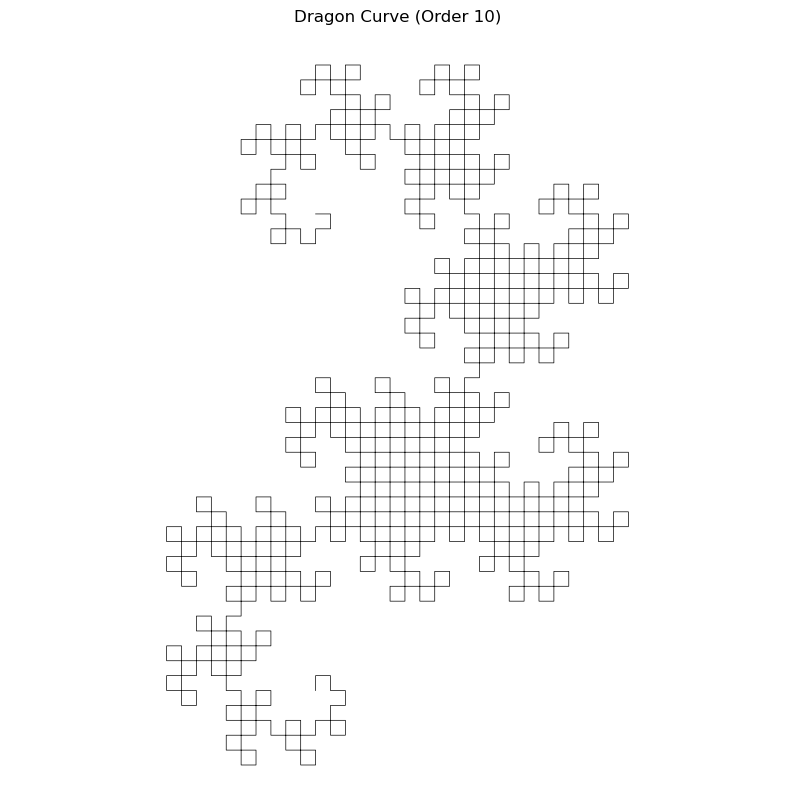

In [5]:
draw_dragon_curve(order=10, step_size=1.0)

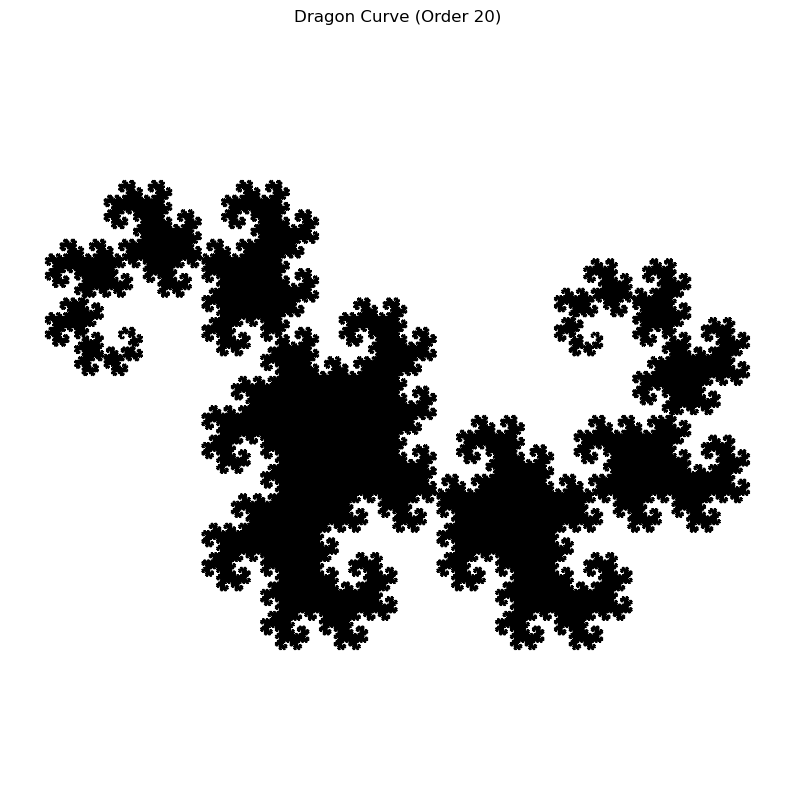

In [6]:
draw_dragon_curve(order=20, step_size=1.0)